In [257]:
import sklearn
import pickle
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [258]:
#cargar de un pickle

with open('/home/jupyter/Pickles/Descriptores/train.pickle', 'rb') as train:
    train_list = pickle.load(train)


with open('/home/jupyter/Pickles/Descriptores/validation.pickle', 'rb') as validation:
    validation_list = pickle.load(validation)

In [259]:
with open('/home/jupyter/Pickles/Imagenes/images_train.pickle', 'rb') as trains:
    images_train_list = pickle.load(trains)


with open('/home/jupyter/Pickles/Imagenes/images_validation.pickle', 'rb') as validations:
    images_validation_list = pickle.load(validations)

In [238]:
#cerca con todas las imagenes
v_val = np.reshape(validation_list[70], (1,4096))
v_train = np.reshape(train_list, (1194,4096))

In [239]:
v_train = sklearn.preprocessing.normalize(train_list, norm='l2', axis=1, copy=True, return_norm=False)
v_val = sklearn.preprocessing.normalize(v_val, norm='l2', axis=1, copy=True, return_norm=False)

In [240]:
train_list_t = v_train.transpose()

In [241]:
res= np.matmul(v_val, train_list_t)

In [242]:
ranks = np.argsort(res, axis=1)[:,::-1]
x_train_img = []
x_val_img = []

In [243]:
x_val_img.append(np.array(images_validation_list[70]))

In [244]:
j = 0
for j in range (1194):
    x_train_img.append(np.array(images_train_list[j]))

In [245]:
h,w = (224, 224)
new_image= Image.new('RGB', (h*5,w*1))

# Visualize ranks of the 10 queries
offset = 10 # it will show results from query #'offset' to #offset+10
for q in range(1):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(5):
      new_image.paste(Image.fromarray(x_train_img[ranks_q[i]]), (h*(1+i),w*q))
  # visualize query
  ima_q = Image.fromarray(x_val_img[0])
  ima_q = ImageOps.expand(ima_q, border=15, fill='orange')

  new_image.paste(ima_q, (0,w*q))

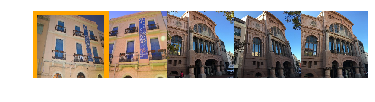

In [246]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [247]:
new_image.save('no_funciona.jpg')